<a href="https://colab.research.google.com/github/hasune613/hello-world/blob/main/%E6%B6%88%E8%B2%BB%E9%9B%BB%E5%8A%9B%E9%87%8F%E3%81%AE%E9%9C%80%E8%A6%81%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pystan
!pip install -q fbprophet

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
_df = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2017.csv',encoding='shift-jis',skiprows=1)

In [ ]:
_df.tail()

,DATE,TIME,実績(万kW)
8755,2017/12/31,19:00,3527
8756,2017/12/31,20:00,3443
8757,2017/12/31,21:00,3335
8758,2017/12/31,22:00,3200
8759,2017/12/31,23:00,3141


In [ ]:
years = [2017, 2018, 2019]
# year = years[2]
df = pd.DataFrame()
for year in years:
    _df = pd.read_csv(f'https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv',encoding='shift-jis',skiprows=1)
    df = pd.concat([df,_df],axis=0)

In [ ]:
df.head()

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389


In [ ]:
df =df.reset_index(drop=True)

In [ ]:
df.shape

(26280, 3)

In [ ]:
date = df['DATE'][0]
time = df['TIME'][0]

str_datetime = f'{date} {time}'
str_datetime

'2017/1/1 0:00'

In [ ]:
from datetime import datetime as dt

In [ ]:
dt.strptime(str_datetime,'%Y/%m/%d %H:%M')

datetime.datetime(2017, 1, 1, 0, 0)

In [ ]:
datetimes = []

for index,datum in df.iterrows():
    date = datum['DATE']
    time = datum['TIME']
    str_datetime = f'{date} {time}'
    datetime = dt.strptime(str_datetime,'%Y/%m/%d %H:%M')
    datetimes.append(datetime)

In [ ]:
datetimes[:3]

[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 1, 0),
 datetime.datetime(2017, 1, 1, 2, 0)]

In [ ]:
df['ds']=datetimes
df.head()

,DATE,TIME,実績(万kW),ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00


In [ ]:
df = df.rename(columns={'実績(万kW)':'y'})
df

,DATE,TIME,y,ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00
...,...,...,...,...
26275,2019/12/31,19:00,3302,2019-12-31 19:00:00
26276,2019/12/31,20:00,3263,2019-12-31 20:00:00
26277,2019/12/31,21:00,3182,2019-12-31 21:00:00
26278,2019/12/31,22:00,3077,2019-12-31 22:00:00


In [ ]:
model = Prophet()
model.fit(df)

In [ ]:
future = model.make_future_dataframe(24*366,freq='H')

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
35059,2020-12-31 19:00:00,2762.320726,966.921434,5852.459392,364.385774,5064.328650,670.635253,670.635253,670.635253,396.227734,396.227734,396.227734,120.977144,120.977144,120.977144,153.430374,153.430374,153.430374,0.0,0.0,0.0,3432.955979
35060,2020-12-31 20:00:00,2762.278350,820.046693,5670.164839,363.923085,5065.077999,566.922395,566.922395,566.922395,292.169710,292.169710,292.169710,121.385983,121.385983,121.385983,153.366703,153.366703,153.366703,0.0,0.0,0.0,3329.200745
35061,2020-12-31 21:00:00,2762.235974,784.292374,5478.911022,363.460396,5065.827348,401.360681,401.360681,401.360681,126.182033,126.182033,126.182033,121.869350,121.869350,121.869350,153.309298,153.309298,153.309298,0.0,0.0,0.0,3163.596655
35062,2020-12-31 22:00:00,2762.193598,618.709121,5326.539166,362.997707,5066.576698,190.194424,190.194424,190.194424,-85.475310,-85.475310,-85.475310,122.411558,122.411558,122.411558,153.258175,153.258175,153.258175,0.0,0.0,0.0,2952.388022
35063,2020-12-31 23:00:00,2762.151222,232.961793,5044.267369,362.535018,5067.326047,-27.942535,-27.942535,-27.942535,-304.148420,-304.148420,-304.148420,122.992535,122.992535,122.992535,153.213350,153.213350,153.213350,0.0,0.0,0.0,2734.208687


In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          35064 non-null  datetime64[ns]
 1   trend                       35064 non-null  float64       
 2   yhat_lower                  35064 non-null  float64       
 3   yhat_upper                  35064 non-null  float64       
 4   trend_lower                 35064 non-null  float64       
 5   trend_upper                 35064 non-null  float64       
 6   additive_terms              35064 non-null  float64       
 7   additive_terms_lower        35064 non-null  float64       
 8   additive_terms_upper        35064 non-null  float64       
 9   daily                       35064 non-null  float64       
 10  daily_lower                 35064 non-null  float64       
 11  daily_upper                 35064 non-null  float64   

In [ ]:
import matplotlib.pyplot as plt


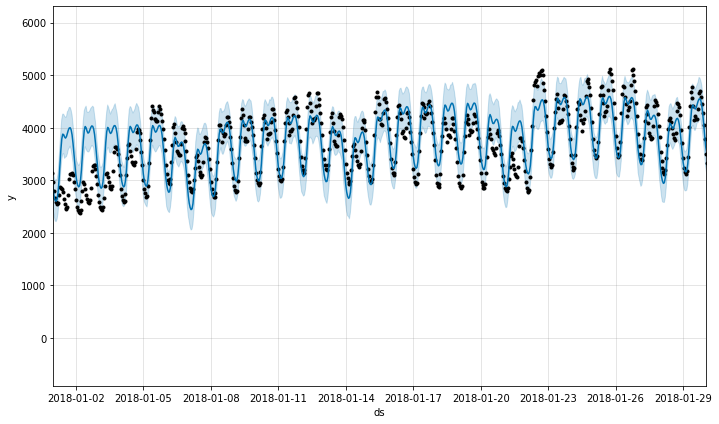

In [ ]:
model.plot(forecast)
plt.xlim(dt(2018,1,1),dt(2018,1,30))
plt.show()

In [ ]:
df_2020 = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2020.csv',encoding='shift-jis',skiprows=1)

In [ ]:
df_2020.head()

,DATE,TIME,実績(万kW)
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


In [ ]:
forecast_2020 = forecast[forecast['ds'] >=dt(2020,1,1)].reset_index(drop=True)

In [ ]:
forecast_2020.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,3134.340011,2506.612663,3309.493299,3134.340011,3134.340011,-224.856836,-224.856836,-224.856836,-488.417802,-488.417802,-488.417802,108.739814,108.739814,108.739814,154.821152,154.821152,154.821152,0.0,0.0,0.0,2909.483175
1,2020-01-01 01:00:00,3134.297635,2391.561375,3170.942401,3134.297635,3134.297635,-354.546087,-354.546087,-354.546087,-617.309962,-617.309962,-617.309962,108.086395,108.086395,108.086395,154.677480,154.677480,154.677480,0.0,0.0,0.0,2779.751548
2,2020-01-01 02:00:00,3134.255259,2299.037576,3121.171865,3134.255259,3134.255259,-432.164816,-432.164816,-432.164816,-694.375983,-694.375983,-694.375983,107.671307,107.671307,107.671307,154.539860,154.539860,154.539860,0.0,0.0,0.0,2702.090443
3,2020-01-01 03:00:00,3134.212883,2271.353620,3064.142083,3134.212883,3134.212883,-466.064530,-466.064530,-466.064530,-727.960893,-727.960893,-727.960893,107.488055,107.488055,107.488055,154.408308,154.408308,154.408308,0.0,0.0,0.0,2668.148353
4,2020-01-01 04:00:00,3134.170507,2304.097482,3054.421216,3134.170507,3134.170507,-446.333967,-446.333967,-446.333967,-708.142983,-708.142983,-708.142983,107.526173,107.526173,107.526173,154.282843,154.282843,154.282843,0.0,0.0,0.0,2687.836539


In [ ]:
df_2020 = df_2020.rename(columns={'実績(万kW)' : 'y'})

In [ ]:
df_2020.head()

,DATE,TIME,y
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


In [ ]:
# forecast_2020['yhat'] yhat ⇒ 予測値

In [ ]:
results = pd.DataFrame()
results['t'] = df_2020[ 'y' ]
results['y'] = forecast_2020['yhat']

In [ ]:
results['diff'] = results['t']-results['y']

In [ ]:
results

,t,y,diff
0,2857,2909.483175,-52.483175
1,2703,2779.751548,-76.751548
2,2602,2702.090443,-100.090443
3,2520,2668.148353,-148.148353
4,2464,2687.836539,-223.836539
...,...,...,...
8779,3746,3432.955979,313.044021
8780,3673,3329.200745,343.799255
8781,3560,3163.596655,396.403345
8782,3443,2952.388022,490.611978


In [ ]:
import numpy as np

In [ ]:
np.mean(abs((results['y']-results['t']) / results['t'])*100)

10.123644353466581

In [ ]:
df_holidays = pd.read_csv('/content/drive/MyDrive/いまにゅ/holidays+hotdays+hour_2017_2019.csv')

In [ ]:
df_holidays

,ds,holiday,lower_window,upper_window
0,2017/1/1 0:00,holiday,0,1
1,2017/1/1 1:00,holiday,0,1
2,2017/1/1 10:00,holiday,0,1
3,2017/1/1 11:00,holiday,0,1
4,2017/1/1 12:00,holiday,0,1
...,...,...,...,...
2329,2019/12/31 5:00,holiday,0,1
2330,2019/12/31 6:00,holiday,0,1
2331,2019/12/31 7:00,holiday,0,1
2332,2019/12/31 8:00,holiday,0,1


In [ ]:
df.y.max()

5653

In [ ]:
df['cap'] = 5700

In [ ]:
df.tail()

,DATE,TIME,y,ds,cap
26275,2019/12/31,19:00,3302,2019-12-31 19:00:00,5700
26276,2019/12/31,20:00,3263,2019-12-31 20:00:00,5700
26277,2019/12/31,21:00,3182,2019-12-31 21:00:00,5700
26278,2019/12/31,22:00,3077,2019-12-31 22:00:00,5700
26279,2019/12/31,23:00,3029,2019-12-31 23:00:00,5700


In [ ]:
model = Prophet(
    growth='logistic',
    yearly_seasonality = True,
    weekly_seasonality = True,
    daily_seasonality = True,
    holidays=df_holidays

)

In [ ]:
model.fit(df)

In [ ]:
future['cap'] = 5700

In [ ]:
future

,ds,cap
0,2017-01-01 00:00:00,5700
1,2017-01-01 01:00:00,5700
2,2017-01-01 02:00:00,5700
3,2017-01-01 03:00:00,5700
4,2017-01-01 04:00:00,5700
...,...,...
35059,2020-12-31 19:00:00,5700
35060,2020-12-31 20:00:00,5700
35061,2020-12-31 21:00:00,5700
35062,2020-12-31 22:00:00,5700


In [ ]:
forecast = model.predict(future)


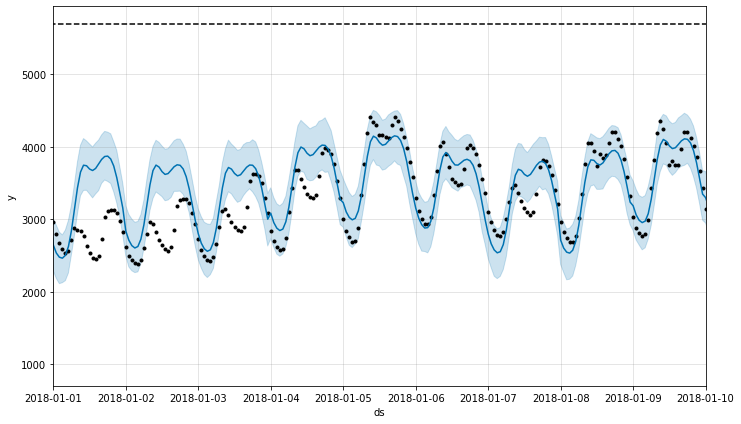

In [ ]:
model.plot(forecast)
plt.xlim(dt(2018,1,1),dt(2018,1,10))
plt.show()

In [ ]:
forecast_2020 = forecast[forecast['ds'] >= dt(2020,1,1)].reset_index(drop=True)
forecast_2020.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holiday,holiday_lower,holiday_upper,holidays,holidays_lower,holidays_upper,hotday,hotday_lower,hotday_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,3260.131643,5700,2642.076675,3369.145777,3260.131643,3260.131643,-264.600723,-264.600723,-264.600723,-488.412231,-488.412231,-488.412231,-136.404575,-136.404575,-136.404575,-136.404575,-136.404575,-136.404575,0.0,0.0,0.0,106.450247,106.450247,106.450247,253.765836,253.765836,253.765836,0.0,0.0,0.0,2995.530920
1,2020-01-01 01:00:00,3260.133809,5700,2519.374685,3228.815696,3260.133809,3260.133809,-394.622222,-394.622222,-394.622222,-617.297056,-617.297056,-617.297056,-136.404575,-136.404575,-136.404575,-136.404575,-136.404575,-136.404575,0.0,0.0,0.0,105.248625,105.248625,105.248625,253.830784,253.830784,253.830784,0.0,0.0,0.0,2865.511587
2,2020-01-01 02:00:00,3260.135975,5700,2432.980546,3148.220172,3260.135975,3260.135975,-472.534629,-472.534629,-472.534629,-694.361081,-694.361081,-694.361081,-136.404575,-136.404575,-136.404575,-136.404575,-136.404575,-136.404575,0.0,0.0,0.0,104.331912,104.331912,104.331912,253.899114,253.899114,253.899114,0.0,0.0,0.0,2787.601346
3,2020-01-01 03:00:00,3260.138141,5700,2400.047890,3105.439164,3260.138141,3260.138141,-506.689630,-506.689630,-506.689630,-727.948571,-727.948571,-727.948571,-136.404575,-136.404575,-136.404575,-136.404575,-136.404575,-136.404575,0.0,0.0,0.0,103.692680,103.692680,103.692680,253.970836,253.970836,253.970836,0.0,0.0,0.0,2753.448512
4,2020-01-01 04:00:00,3260.140307,5700,2418.669445,3129.494496,3260.140307,3260.140307,-487.174007,-487.174007,-487.174007,-708.134485,-708.134485,-708.134485,-136.404575,-136.404575,-136.404575,-136.404575,-136.404575,-136.404575,0.0,0.0,0.0,103.319091,103.319091,103.319091,254.045961,254.045961,254.045961,0.0,0.0,0.0,2772.966300


In [ ]:
results = pd.DataFrame()
results['t'] = df_2020[ 'y' ]
results['y'] = forecast_2020['yhat']

In [ ]:
results['diff'] = results['t']-results['y']

In [ ]:
results.head()

,t,y,diff
0,2857,2995.530920,-138.530920
1,2703,2865.511587,-162.511587
2,2602,2787.601346,-185.601346
3,2520,2753.448512,-233.448512
4,2464,2772.966300,-308.966300


In [ ]:
np.mean(abs((results['y']-results['t']) / results['t'])*100)

8.988907569161343

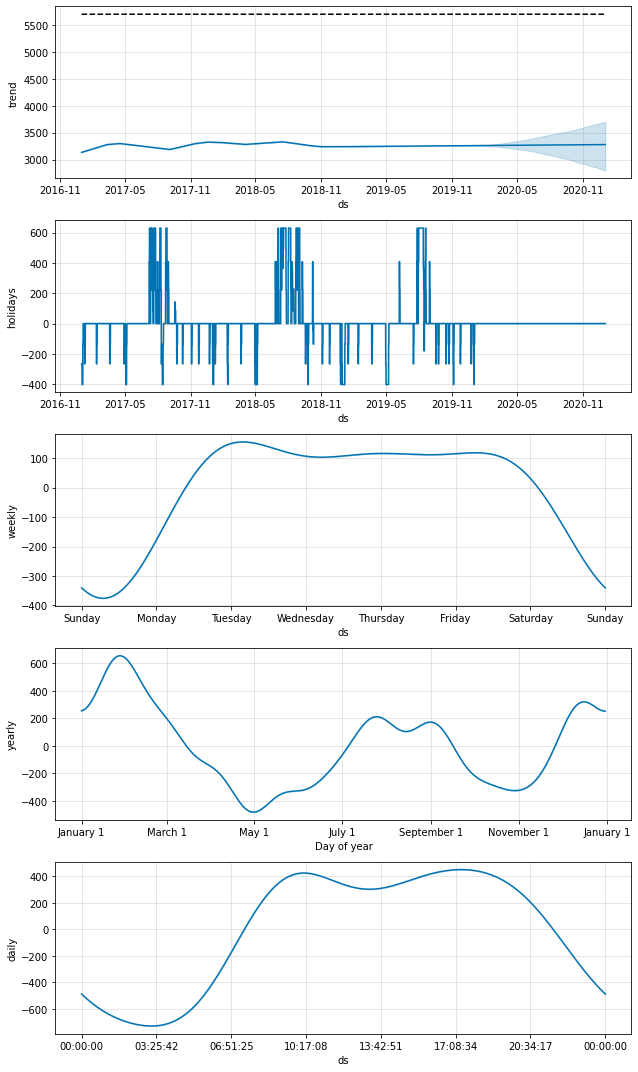

In [ ]:
model.plot_components(forecast)
plt.show()